<a href="https://colab.research.google.com/github/aragakerubo/cis635-homework-assignments/blob/main/Hilda_Ogamba_Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Data Preprocessing

## Overview

### About the data set
This homework aims to give you hands-on experience in various essential data preprocessing techniques. Using the **California Housing Dataset**, you will practice calculating descriptive statistics, cleaning data, normalizing and discretizing data, visualizing distributions, and calculating dissimilarity matrices.

### Objectives

- Practice calculating descriptive statistics, handling missing values, and detecting duplicates.
- Learn how to normalize and discretize attributes.
- Visualize data distributions using histograms, box plots, and scatter plots.
- Compute dissimilarity matrices for nominal, ordinal, and mixed-type attributes.

### The attributes in the dataset:
1. **longitude**: Longitude coordinate of the block where the house is located.
2. **latitude**: Latitude coordinate of the block where the house is located.
3. **housingMedianAge**: Median age of houses within a block (years).
4. **totalRooms**: Total number of rooms within a block.
5. **totalBedrooms**: Total number of bedrooms within a block.
6. **population**: Total population of a block.
7. **households**: Total number of households within a block.
8. **medianIncome**: Median income for households in the block (in tens of thousands of dollars).
9. **medianHouseValue**: Median house value for households in a block (in US dollars).
10. **oceanProximity**: Proximity of the block to the ocean.






## Import and Setting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from matplotlib.pylab import rcParams

In [ ]:
# Set the default figure size for matplotlib plots to 15 inches wide by 6 inches tall
rcParams["figure.figsize"] = (15, 6)

# Increase the default font size of the titles in matplotlib plots to extra-extra-large
rcParams["axes.titlesize"] = "xx-large"

# Make the titles of axes in matplotlib plots bold for better visibility
rcParams["axes.titleweight"] = "bold"

# Set the default location of the legend in matplotlib plots to the upper left corner
rcParams["legend.loc"] = "upper left"

# Configure pandas to display all columns of a DataFrame when printed to the console
pd.set_option('display.max_columns', None)

# Configure pandas to display all rows of a DataFrame when printed to the console
pd.set_option('display.max_rows', None)

### Data Loading
Load the California housing dataset as a data frame `df`

In [ ]:
url = "https://gvsu-cis635.github.io/_downloads/cbdbd448a2884edab50a2bc50eb89749/housing.csv"
df = pd.read_csv(url)
print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))
display(df.info())
display(df.head(n=10))

Number of instances = 20640
Number of attributes = 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


None

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


## Question 1. Descriptive Statistics
Calculate and display the mean, median, maximum, minimum, standard deviation, and Interquartile Range (IQR) for all the **Numeric** attributes in the dataframe `df`.

In [ ]:
# Extract only numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate the required statistics
statistics = {
    'Mean': numeric_df.mean(),
    'Median': numeric_df.median(),
    'Max': numeric_df.max(),
    'Min': numeric_df.min(),
    'Std Dev': numeric_df.std(),
    'IQR': numeric_df.quantile(0.75) - numeric_df.quantile(0.25)
}

# Convert the statistics dictionary to a DataFrame for easy display
statistics_df = pd.DataFrame(statistics)
display(statistics_df)


,Mean,Median,Max,Min,Std Dev,IQR
longitude,-119.569704,-118.4900,-114.3100,-124.3500,2.003532,3.79000
latitude,35.631861,34.2600,41.9500,32.5400,2.135952,3.78000
housing_median_age,28.639486,29.0000,52.0000,1.0000,12.585558,19.00000
total_rooms,2635.763081,2127.0000,39320.0000,2.0000,2181.615252,1700.25000
total_bedrooms,537.870553,435.0000,6445.0000,1.0000,421.385070,351.00000
population,1425.476744,1166.0000,35682.0000,3.0000,1132.462122,938.00000
households,499.539680,409.0000,6082.0000,1.0000,382.329753,325.00000
median_income,3.870671,3.5348,15.0001,0.4999,1.899822,2.17985
median_house_value,206855.816909,179700.0000,500001.0000,14999.0000,115395.615874,145125.00000


### Question 2: Data Cleaning

1. **Missing Values**: First, check if there are any samples with missing data. If found, display the affected samples and fill the missing values with the attribute's average. If no missing values exist, no further action is needed.

2. **Duplicate Detection**: Check for any duplicate records. If duplicates are found, display and remove all but one instance of each duplicate; otherwise, no further steps are required.

In [ ]:
# check if there are any (numeric) samples with missing data
missing_data = df[numeric_df.columns].isnull().sum()
missing_data = missing_data[missing_data > 0]

# display the number of attributes with missing data
print('Number of attributes with missing data: %d' % len(missing_data))

# display the affected samples and fill the missing values with the attribute's average
if len(missing_data) > 0:
    print('Attributes with missing data and number of records affected:')
    display(missing_data)
    imputer = SimpleImputer(strategy='mean')
    df[missing_data.index] = imputer.fit_transform(df[missing_data.index])
    print('Missing data has been filled with the attribute\'s average.')
else:
    # if no missing values exist, no further action is needed
    print('No missing data found.')

print('---' * 30)

# check for any duplicate records
duplicate_rows = df.duplicated()
duplicate_rows = df[duplicate_rows]
print('Number of duplicate records: %d' % len(duplicate_rows))


# if duplicate records exist, display them and remove all but one instance
if len(duplicate_rows) > 0:
    print('Duplicate records:')
    display(duplicate_rows)
    df.drop_duplicates(inplace=True)
    print('Duplicate records have been removed.')
else:
    # if no duplicate records exist, no further action is needed
    print('No duplicate records found.')


Number of attributes with missing data: 1
Attributes with missing data and number of records affected:


,0
total_bedrooms,207


Missing data has been filled with the attribute's average.
------------------------------------------------------------------------------------------
Number of duplicate records: 0
No duplicate records found.


### Question 3: Data Normalization
Normalize all numerical attributes using **Z-score normalization** and save the result as `df_normalized`.

In [ ]:
# Create a copy of df to avoid modifying the original DataFrame
df_normalized = df.copy()

# Initialize the StandardScaler object
scaler = StandardScaler()

# Normalize the numeric columns
df_normalized[numeric_df.columns] = scaler.fit_transform(df_normalized[numeric_df.columns])

# Display the first 10 records of the normalized DataFrame
display(df_normalized.head(10))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,2.129631,NEAR BAY
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.314156,NEAR BAY
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.258693,NEAR BAY
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.165100,NEAR BAY
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.172900,NEAR BAY
5,-1.337818,1.038503,1.856182,-0.786942,-0.774873,-0.894071,-0.801787,0.087447,0.544611,NEAR BAY
6,-1.337818,1.033821,1.856182,-0.046188,-0.116565,-0.292712,0.037823,-0.111366,0.800259,NEAR BAY
7,-1.337818,1.033821,1.856182,0.214634,0.355700,-0.237079,0.385698,-0.395137,0.299362,NEAR BAY
8,-1.342809,1.033821,1.061601,-0.037021,0.303226,-0.193810,0.249687,-0.942359,0.171971,NEAR BAY
9,-1.337818,1.033821,1.856182,0.418616,0.403403,0.110844,0.560944,-0.094470,0.470083,NEAR BAY


### Question 4: Data Discretization
Create two new features, `ew_median_house_value` and `ed_median_house_value`, in the `df` dataframe by transforming the `median_house_value` attribute into a discrete categorical feature with three categories (low, medium, high) using the following methods:
1. **Equal-width binning**: Divide the range of `median_house_value` into intervals of equal size and create `ew_median_house_value`.
2. **Equal-depth binning**: Distribute the `median_house_value` values into bins so that each bin contains roughly the same number of records, creating `ed_median_house_value`.

In [ ]:
# Define the number of bins, bin labels
num_bins = 3
bin_labels = ["low", "medium", "high"]

# Create two new features ew_median_house_value and ed_median_house_value from the median_house_value column
# Equal-width binning - the bins have the similar width(range)
df['ew_median_house_value'] = pd.cut(df['median_house_value'], bins=num_bins, labels=bin_labels)
# Equal-depth binning - the bins have the similar number of samples(records)
df['ed_median_house_value'] = pd.qcut(df['median_house_value'], q=num_bins, labels=bin_labels)

# Display the first 10 records of the DataFrame with the new features
display(df[['median_house_value', 'ew_median_house_value', 'ed_median_house_value']].head(10))

,median_house_value,ew_median_house_value,ed_median_house_value
0,452600.0,high,high
1,358500.0,high,high
2,352100.0,high,high
3,341300.0,high,high
4,342200.0,high,high
5,269700.0,medium,high
6,299200.0,medium,high
7,241400.0,medium,high
8,226700.0,medium,medium
9,261100.0,medium,high


### Question 5: Data Visualization
Visualize the `median_house_value` and `housing_median_age` attributes in `df_normalized` using:
- Box plots to examine the distributions of `median_house_value` and `housing_median_age`.
- Histograms (using 50 bins) to observe the frequency distributions of `median_house_value` and `housing_median_age`.
- Scatter plot to explore the relationship between `median_house_value` and `housing_median_age`.

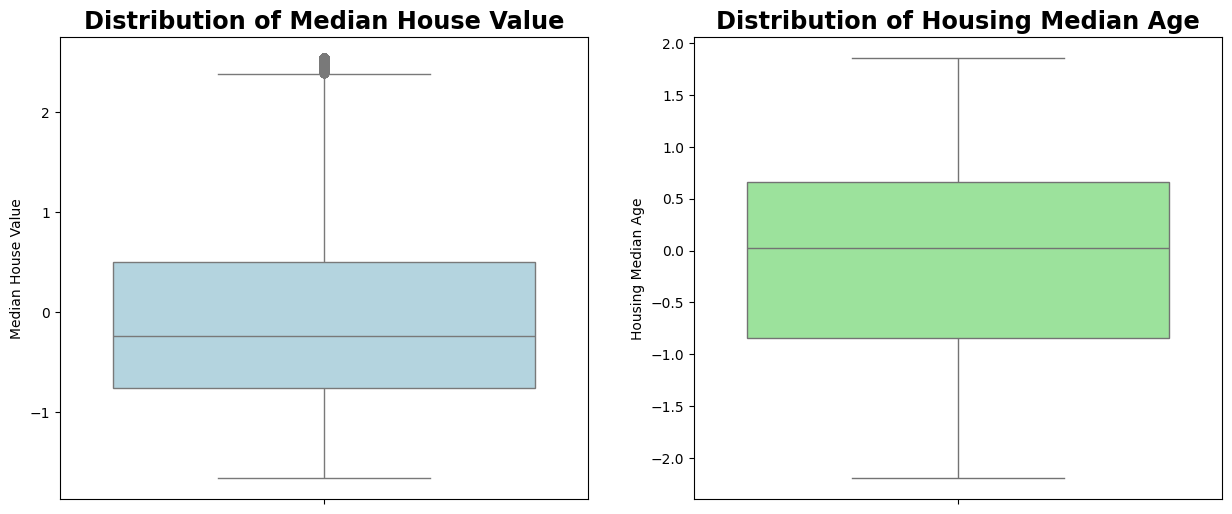

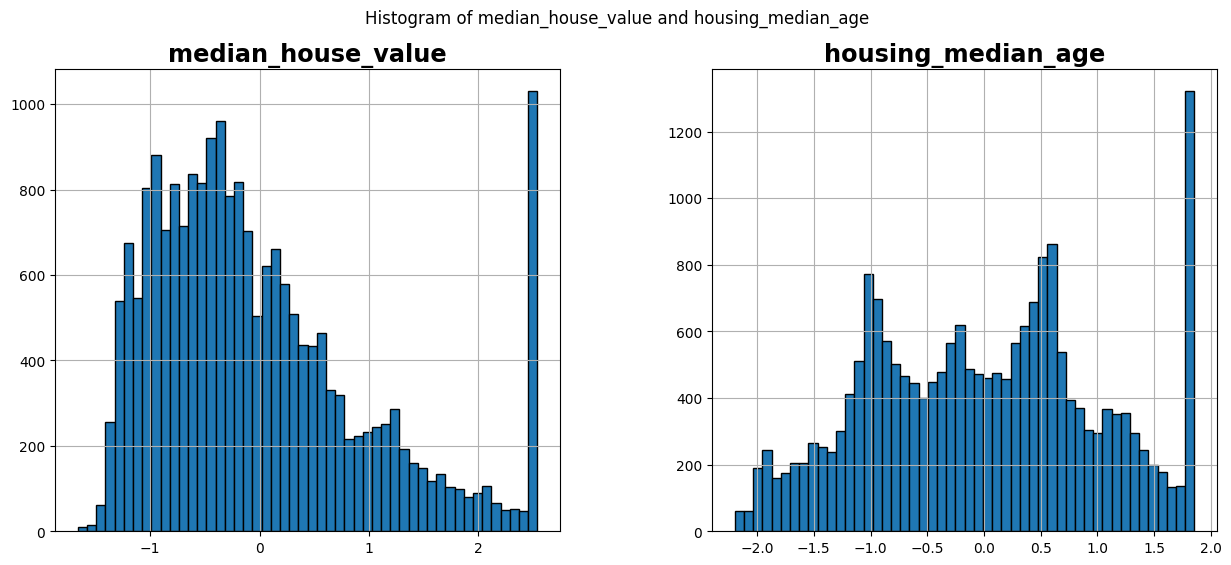

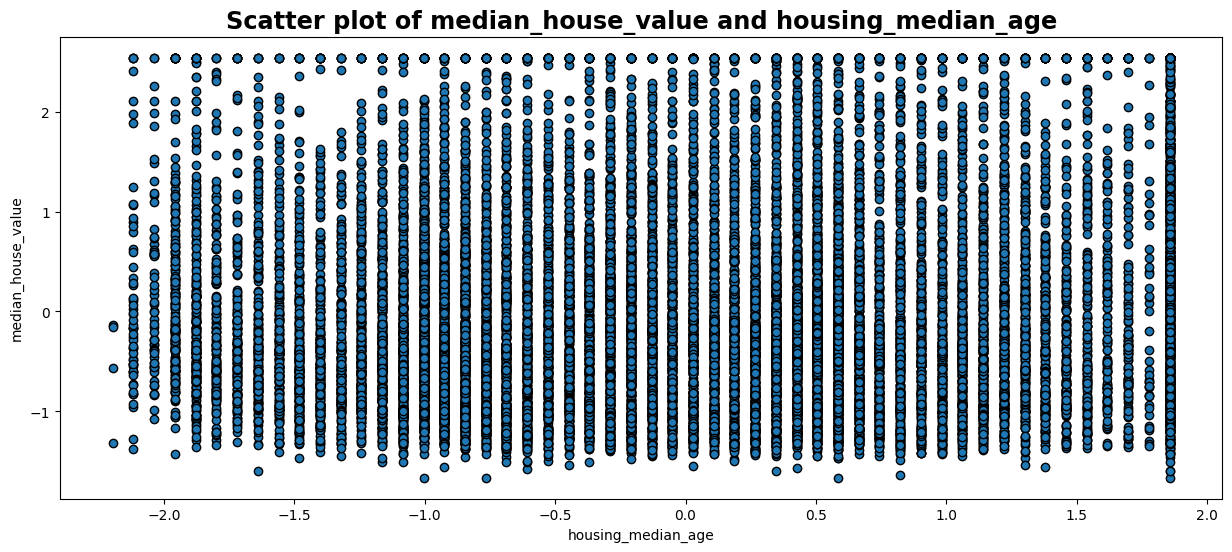

In [ ]:
# Box plot of the median_house_value and housing_median_age columns
# sns.boxplot(x='housing_median_age', y='median_house_value', data=df_normalized)
# plt.xticks(rotation=90) # Rotate x-axis labels to avoid overlap
# plt.title('Box plot of median_house_value and housing_median_age')
# plt.xlabel('housing_median_age')
# plt.ylabel('median_house_value')
# plt.show()

# Box plot for median_house_value
plt.subplot(1, 2, 1)
sns.boxplot(y=df_normalized['median_house_value'], color='lightblue')
plt.title('Distribution of Median House Value')
plt.ylabel('Median House Value')

# Box plot for housing_median_age
plt.subplot(1, 2, 2)
sns.boxplot(y=df_normalized['housing_median_age'], color='lightgreen')
plt.title('Distribution of Housing Median Age')
plt.ylabel('Housing Median Age')

# Histogram (using 50 bins) of the median_house_value and housing_median_age columns
df_normalized[['median_house_value', 'housing_median_age']].hist(bins=50, edgecolor="black")
plt.suptitle('Histogram of median_house_value and housing_median_age')
plt.show()

# Scatter plot of the median_house_value and housing_median_age columns
plt.scatter(df_normalized['housing_median_age'], df_normalized['median_house_value'], edgecolors='black')
plt.title('Scatter plot of median_house_value and housing_median_age')
plt.xlabel('housing_median_age')
plt.ylabel('median_house_value')
plt.show()

### Question 6: Dissimilarity Matrix for Mixed-Type Attributes
Calculate the **dissimilarity matrix** for **the first 10 data samples** for the following attributes: **`housing_median_age`, `total_rooms`, `total_bedrooms`, `population`, `households`, `median_income`, `ew_median_house_value`(Ordinal), `ocean_proximity`(Nominal)**.

The dissimilarity $d(i,j)$ between objects $i$ and $j$ is defined as:

$$d(i,j)=\frac{\sum^p_{f=1}δ^f_{ij}d^f_{ij}}{\sum^p_{f=1}δ^f_{ij}}$$

where the indicator of attribute $f$, $δ^f_{ij}=0$ in the following cases:
1. If $x_i^f$ or $x_j^f$ is missing.
2. If $x_i^f = x_j^f = 0$ and the attribute $f$ is asymmetric binary.
3. Otherwise, $δ^f_{ij}=1$.

For each attribute type:
- **Numeric**: $d_{ij}^{f} = \frac{|x_i^f-x_j^f|}{\text{max}_f-\text{min}_f}$.
- **Nominal/Binary**: $d_{ij}^f = 0$ if $x_i^f = x_j^f$; otherwise, $d_{ij}^f = 1$.
- **Ordinal**: Suppose that $f$ is an ordinal attribute and has $M_f$ ordered states. Let $1, . . . , M_f$ represent ranking of these ordered states. The dissimilarity of $f$ can be calculated by: normalize the rank $r_i^f$ of the object $i$ and attribute $f$ by $z_i^f = \frac{r_i^f-1}{M_f-1}$, and then compute the dissimilarity using **Euclidean distance**  

In [ ]:
# Extract the required columns, rows, and display the subset of the DataFrame
columns = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ew_median_house_value', 'ocean_proximity']

## 1. Numeric Dissimilarity Matrix

def normalize_numeric_columns(series: pd.Series) -> pd.Series:
    """
    Normalize numeric columns to a range between 0 and 1.

    Parameters:
        series (Series): The numeric column to normalize.

    Returns:
        pd.Series: The normalized numeric column.
    """
    return (series - series.min()) / (series.max() - series.min())

# Get min-max normalized subset of the DataFrame of the numeric columns
numeric_columns = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
df_min_max_normalized = df.copy()
df_min_max_normalized[numeric_columns] = df_min_max_normalized[numeric_columns].apply(normalize_numeric_columns)

# Get the first 10 records of the min-max normalized DataFrame
df_subset = df_min_max_normalized[columns].head(10)

print('Subset of the DataFrame:')
display(df_subset)


def numeric_dissimilarity(numeric_columns: list, row1: pd.Series, row2: pd.Series) -> float:
    """
    Calculate the dissimilarity between two records for normalized numeric attributes.

    Parameters:
        numeric_columns (list): The list of numeric columns.
        row1 (Series): The first record.
        row2 (Series): The second record.

    Returns:
        float: The dissimilarity between the two records.
    """
    total_dissimilarity = 0
    for col in numeric_columns:
        total_dissimilarity += abs(row1[col] - row2[col])  # Absolute difference
    return total_dissimilarity # Sum of differences

# Initialize the numeric dissimilarity matrix
num_records = df_subset.shape[0]
numeric_dissim_matrix = np.zeros((num_records, num_records))

# Calculate numeric dissimilarity matrix
for i in range(num_records):
    for j in range(num_records):
        numeric_dissim_matrix[i, j] = numeric_dissimilarity(numeric_columns, df_subset.iloc[i], df_subset.iloc[j])

# Display the numeric dissimilarity matrix
print("Numeric Dissimilarity Matrix:")
display(pd.DataFrame(numeric_dissim_matrix))

## 2. Ordinal Dissimilarity Matrix (ew_median_house_value)

# Define the ordinal order for 'ew_median_house_value'
ordinal_order = ['low', 'medium', 'high'] # Low (0) < Medium (1) < High (2)

# Convert the ordinal values to normalized ranks based on the predefined order
df_subset.loc[:, 'ew_median_house_value_normalized'] = df_subset['ew_median_house_value'].apply(
    lambda x: ordinal_order.index(x) / (len(ordinal_order) - 1)
)


def ordinal_dissimilarity(series: pd.Series) -> np.ndarray:
    """
    Calculate dissimilarity matrix for normalized ordinal attributes.

    Parameters:
        series (Series): The ordinal attribute series.

    Returns:
        np.ndarray: A dissimilarity matrix.
    """
    # Initialize the dissimilarity matrix
    num_records = series.shape[0]
    dissimilarity_matrix = np.zeros((num_records, num_records))


    # Calculate using Euclidean distance
    for i in range(num_records):
        for j in range(num_records):
            dissimilarity_matrix[i, j] = ((series[i] - series[j]) ** 2) ** 0.5
    return dissimilarity_matrix

# Calculate dissimilarity matrix for ordinal attribute 'ew_median_house_value'
ordinal_dissim_matrix = ordinal_dissimilarity(df_subset['ew_median_house_value_normalized'])

print("Ordinal Dissimilarity Matrix (ew_median_house_value):")
display(pd.DataFrame(ordinal_dissim_matrix))

## 3. Nominal Dissimilarity Matrix (ocean_proximity)

def nominal_dissimilarity(series: pd.Series) -> np.ndarray:
    """
    Calculate dissimilarity matrix for nominal attributes.

    Parameters:
        series (Series): The nominal attribute series.

    Returns:
        np.ndarray: A dissimilarity matrix (0 if same, 1 if different).
    """
    # Initialize the dissimilarity matrix
    num_records = series.shape[0]
    dissimilarity_matrix = np.zeros((num_records, num_records))

    # Calculate dissimilarity matrix
    for i in range(num_records):
        for j in range(num_records):
            if series[i] != series[j]:
                dissimilarity_matrix[i, j] = 1  # 1 if values are different, 0 if the same
    return dissimilarity_matrix

# Calculate dissimilarity matrix for nominal attribute 'ocean_proximity'
nominal_dissim_matrix = nominal_dissimilarity(df_subset['ocean_proximity'])

print("Nominal Dissimilarity Matrix (ocean_proximity):")
display(pd.DataFrame(nominal_dissim_matrix))

## 4. Mixed-Type Dissimilarity Matrix (Average of Numeric, Ordinal, and Nominal)

def mixed_dissimilarity(numeric_matrix, ordinal_matrix, nominal_matrix) -> np.ndarray:
    """
    Calculate the mixed dissimilarity matrix as the average of numeric, ordinal, and nominal dissimilarity matrices.

    Parameters:
        numeric_matrix (np.ndarray): The numeric dissimilarity matrix.
        ordinal_matrix (np.ndarray): The ordinal dissimilarity matrix.
        nominal_matrix (np.ndarray): The nominal dissimilarity matrix.

    Returns:
        np.ndarray: The mixed dissimilarity matrix.
    """
    # Average the three matrices element-wise
    mixed_matrix = (numeric_matrix + ordinal_matrix + nominal_matrix) / len(columns) # Number of valid attributes
    return mixed_matrix

# Calculate the mixed dissimilarity matrix
mixed_dissim_matrix = mixed_dissimilarity(numeric_dissim_matrix, ordinal_dissim_matrix, nominal_dissim_matrix)

print("Mixed-Type Dissimilarity Matrix:")
display(pd.DataFrame(mixed_dissim_matrix))


Subset of the DataFrame:


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ew_median_house_value,ocean_proximity
0,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,high,NEAR BAY
1,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,high,NEAR BAY
2,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,high,NEAR BAY
3,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,high,NEAR BAY
4,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,high,NEAR BAY
5,1.000000,0.023323,0.032899,0.011491,0.031574,0.243921,medium,NEAR BAY
6,1.000000,0.064423,0.075729,0.030578,0.084361,0.217873,medium,NEAR BAY
7,1.000000,0.078895,0.106456,0.032344,0.106233,0.180694,medium,NEAR BAY
8,0.803922,0.064932,0.103042,0.033717,0.097681,0.108998,medium,NEAR BAY
9,1.000000,0.090213,0.109559,0.043387,0.117250,0.220087,medium,NEAR BAY


Numeric Dissimilarity Matrix:


,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.928274,0.326986,0.449034,0.595692,0.539030,0.720883,0.826897,0.677959,0.823987
1,0.928274,0.000000,1.176658,1.277269,1.378456,1.408829,1.279071,1.247415,1.147587,1.171540
2,0.326986,1.176658,0.000000,0.131866,0.268706,0.244572,0.393897,0.499911,0.743130,0.497001
3,0.449034,1.277269,0.131866,0.000000,0.146658,0.131560,0.271849,0.377863,0.621082,0.374952
4,0.595692,1.378456,0.268706,0.146658,0.000000,0.056663,0.125191,0.231205,0.474424,0.228295
5,0.539030,1.408829,0.244572,0.131560,0.056663,0.000000,0.181853,0.287867,0.531086,0.284957
6,0.720883,1.279071,0.393897,0.271849,0.125191,0.181853,0.000000,0.106014,0.349233,0.107531
7,0.826897,1.247415,0.499911,0.377863,0.231205,0.287867,0.106014,0.000000,0.295076,0.075875
8,0.677959,1.147587,0.743130,0.621082,0.474424,0.531086,0.349233,0.295076,0.000000,0.368204
9,0.823987,1.171540,0.497001,0.374952,0.228295,0.284957,0.107531,0.075875,0.368204,0.000000


Ordinal Dissimilarity Matrix (ew_median_house_value):


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.5,0.5
1,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.5,0.5
2,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.5,0.5
3,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.5,0.5
4,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.5,0.5
5,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0
6,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0
7,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0
8,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0
9,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0


Nominal Dissimilarity Matrix (ocean_proximity):


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Mixed-Type Dissimilarity Matrix:


,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.116034,0.040873,0.056129,0.074462,0.129879,0.152610,0.165862,0.147245,0.165498
1,0.116034,0.000000,0.147082,0.159659,0.172307,0.238604,0.222384,0.218427,0.205948,0.208942
2,0.040873,0.147082,0.000000,0.016483,0.033588,0.093071,0.111737,0.124989,0.155391,0.124625
3,0.056129,0.159659,0.016483,0.000000,0.018332,0.078945,0.096481,0.109733,0.140135,0.109369
4,0.074462,0.172307,0.033588,0.018332,0.000000,0.069583,0.078149,0.091401,0.121803,0.091037
5,0.129879,0.238604,0.093071,0.078945,0.069583,0.000000,0.022732,0.035983,0.066386,0.035620
6,0.152610,0.222384,0.111737,0.096481,0.078149,0.022732,0.000000,0.013252,0.043654,0.013441
7,0.165862,0.218427,0.124989,0.109733,0.091401,0.035983,0.013252,0.000000,0.036884,0.009484
8,0.147245,0.205948,0.155391,0.140135,0.121803,0.066386,0.043654,0.036884,0.000000,0.046025
9,0.165498,0.208942,0.124625,0.109369,0.091037,0.035620,0.013441,0.009484,0.046025,0.000000
